In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import cluster
from collections import Counter
from sklearn.cluster import KMeans
import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()



In [2]:
%matplotlib inline

### Task 1.1

In [3]:
#parses csv into df
df_q1 = pd.read_csv('HealthyRideRentals2021-Q1.csv', sep=',', engine='python', parse_dates=['Starttime'])
df_q2 = pd.read_csv('HealthyRideRentals2021-Q2.csv', sep=',', engine='python', parse_dates=['Starttime'])
df_q3 = pd.read_csv('HealthyRideRentals2021-Q3.csv', sep=',', engine='python', parse_dates=['Starttime',])

#singular df of all 3 quarters
df_total = pd.concat([df_q1, df_q2, df_q3])

#adds date column
df_total['date'] = df_total['Starttime'].dt.date

#fromCNT
df_from_day = df_total.groupby(['date', 'From station id'])['From station id'].count().rename('fromCNT')

#toCNT
df_to_day = df_total.groupby(['date', 'To station id'])['To station id'].count().rename('toCNT')

#rebalCNT
df_rebal_day = df_total.sort_values(['Bikeid', 'Starttime']).fillna(0)
#makes sure its the same Bike
df_rebal_day['prev_bike_id'] = df_rebal_day['Bikeid'].shift(1)
#prev_station_id is used to see if previous To and current From are different
df_rebal_day['prev_station_id'] = df_rebal_day['To station id'].shift(1)
#checking where prev_station_id != From station id and where Bikeid == prev_bike_id which is a rebalance (NaN are not counted)
df_rebal_day = df_rebal_day.loc[(df_rebal_day['From station id'] != df_rebal_day['prev_station_id']) & (df_rebal_day['prev_station_id'] != 0) & (df_rebal_day['From station id'] != 0) & (df_rebal_day['prev_bike_id'] == df_rebal_day['Bikeid'])]
df_rebal_day = df_rebal_day.groupby(['date', 'From station id'])['From station id'].count().rename('rebalCNT')

df_day = pd.concat([df_from_day, df_to_day, df_rebal_day], axis = 1).fillna(0)
print(df_day.head(20))

                    fromCNT  toCNT  rebalCNT
date                                        
2021-01-01 1002.0       1.0    1.0       0.0
           1010.0       1.0    0.0       0.0
           1017.0       0.0    2.0       0.0
           1024.0       1.0    1.0       0.0
           1028.0       1.0    1.0       0.0
           1032.0       1.0    0.0       0.0
           1039.0       0.0    1.0       0.0
           1059.0       1.0    1.0       0.0
           1062.0       2.0    2.0       0.0
           1094.0       2.0    0.0       0.0
           49301.0      1.0    2.0       0.0
           49641.0      0.0    1.0       0.0
           49671.0      1.0    0.0       0.0
           49951.0      1.0    0.0       0.0
2021-01-02 1000.0       1.0    0.0       0.0
           1001.0       2.0    3.0       0.0
           1002.0       3.0    1.0       0.0
           1003.0       2.0    0.0       0.0
           1010.0       1.0    2.0       0.0
           1012.0      14.0   15.0       0.0


### Task 1.2

In [4]:
#adds month column
df_total['month'] = df_total['Starttime'].dt.month

#fromCNT
df_from_month = df_total.groupby(['month', 'From station id'])['From station id'].count().rename('fromCNT')

#toCNT
df_to_month = df_total.groupby(['month', 'To station id'])['To station id'].count().rename('toCNT')

#rebalCNT
df_rebal_month = df_total.sort_values(['Bikeid', 'Starttime']).fillna(0)
#makes sure its the same bike
df_rebal_month['prev_bike_id'] = df_rebal_month['Bikeid'].shift(1)
#prev_station_id is used to see if previous To and current From are different
df_rebal_month['prev_station_id'] = df_rebal_month['To station id'].shift(1)
#checking where prev_station_id != From station id and where Bikeid == prev_bike_id which is a rebalance (NaN are not counted)
df_rebal_month = df_rebal_month.loc[(df_rebal_month['From station id'] != df_rebal_month['prev_station_id']) & (df_rebal_month['prev_station_id'] != 0) & (df_rebal_month['From station id'] != 0) & (df_rebal_month['prev_bike_id'] == df_rebal_month['Bikeid'])]
df_rebal_month = df_rebal_month.groupby(['month', 'From station id'])['From station id'].count().rename('rebalCNT')

df_month = pd.concat([df_from_month, df_to_month, df_rebal_month], axis = 1).fillna(0)
print(df_month.head(20))

              fromCNT  toCNT  rebalCNT
month                                 
1     1000.0     23.0   29.0       1.0
      1001.0     18.0   27.0       0.0
      1002.0     27.0   27.0       2.0
      1003.0      2.0    1.0       0.0
      1004.0     20.0   16.0       3.0
      1005.0      6.0    3.0       0.0
      1006.0      8.0    8.0       1.0
      1007.0      9.0    7.0       1.0
      1009.0      8.0    3.0       0.0
      1010.0     47.0   30.0      11.0
      1011.0      7.0   17.0       0.0
      1012.0     50.0   52.0       2.0
      1013.0     26.0   24.0       7.0
      1014.0      5.0    2.0       2.0
      1015.0     16.0   16.0       2.0
      1016.0     21.0   28.0       0.0
      1017.0     61.0   70.0       0.0
      1018.0     12.0   18.0       0.0
      1019.0     18.0   34.0       0.0
      1020.0      5.0    5.0       0.0


---
### Task 2

In this task you will need to create graphs to show the popularity of the different rental stations, given filter conditions.

In [5]:
# FILTER VARIABLES -- feel free to edit the values, but the names of the variables must remain 
#                     as they are and should be used by your code accordingly from this point on

filter_month = 4
filter_stationID = 1046


### Task 2.1

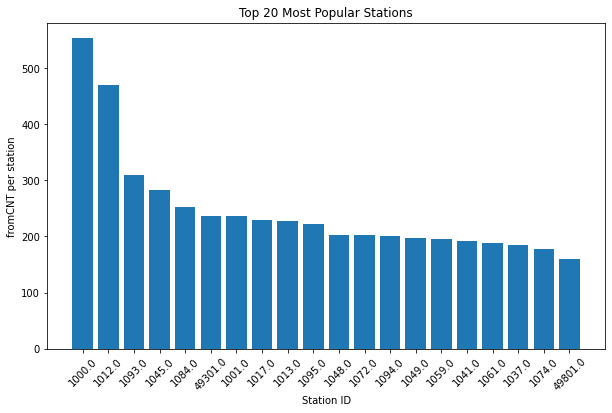

In [6]:
#adds a level_0 index
df_from_month = df_from_month.reset_index()
#makes a new df where only filter month data is included and sorts to top 20
df_pop = df_from_month.loc[df_from_month['month'] == filter_month]
df_pop = df_pop.sort_values(['fromCNT'], ascending = False)
df_pop = df_pop.head(20)

#graphs the above df
fig = plt.figure(figsize=(10, 6))
plt.bar(range(len(df_pop['From station id'])), df_pop['fromCNT'])
plt.xticks(range(len(df_pop['From station id'])),df_pop['From station id'],rotation = 45, fontsize = 10)
plt.xlabel('Station ID')
plt.ylabel('fromCNT per station')
plt.title('Top 20 Most Popular Stations')
plt.show()

### Task 2.2

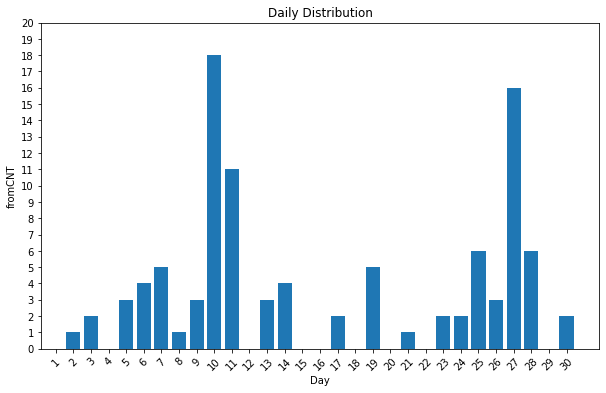

In [7]:
#again, adds level_0 index
df_from_day = df_from_day.reset_index()
df_from_month = df_from_month.reset_index()

#creates day and month columbs
df_from_day['day'] = pd.DatetimeIndex(df_from_day['date']).day
df_from_day['month'] = pd.DatetimeIndex(df_from_day['date']).month

#makes a new df where station id and months match
df_dail_dist = df_from_day.loc[(df_from_day['From station id'] == filter_stationID) & (df_from_day['month'] == filter_month)]

#graphs above df
fig = plt.figure(figsize=(10, 6))
plt.bar(df_dail_dist['day'], df_dail_dist['fromCNT'])
#conditionals to get the ticks on x-axis bc days in a month vary
if(filter_month == 2):
    days = 28
elif(filter_month == 4, 6, 9):
    days = 30
else:
    days = 31
plt.xticks(range(1, days+1), range(1, days+1),rotation = 45, fontsize = 10)
plt.yticks(range(len(df_dail_dist['fromCNT'])),fontsize = 10)
plt.xlabel('Day')
plt.ylabel('fromCNT')
plt.title('Daily Distribution')
plt.show()


### Task 2.3

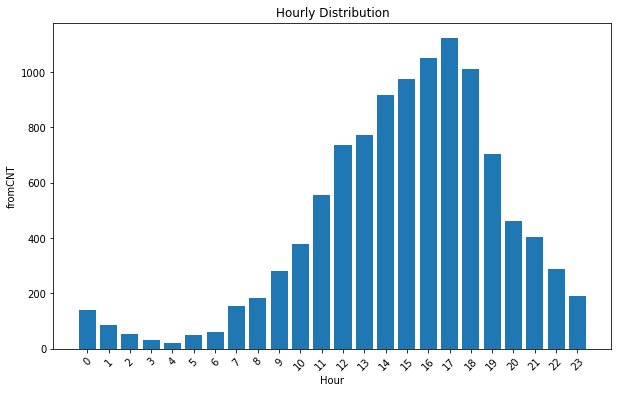

In [8]:
#makes a new df thats grouped by hours as well
df_total['hour'] = df_total['Starttime'].dt.hour
df_from_hour = df_total.groupby(['hour', 'month', 'date', 'From station id'])['From station id'].count().rename('fromCNT').reset_index()

#finds the matching month and sums the hours within that month
df_from_month = df_from_hour.loc[df_from_hour['month'] == filter_month]
df_from_hour = df_from_month.groupby(['hour'])['fromCNT'].sum().rename('fromCNT').reset_index()

#graphs above df
fig = plt.figure(figsize=(10, 6))
plt.bar(df_from_hour['hour'], df_from_hour['fromCNT'])
plt.xticks(range(0, 24), range(0, 24),rotation = 45, fontsize = 10)
plt.xlabel('Hour')
plt.ylabel('fromCNT')
plt.title('Hourly Distribution')
plt.show()

### Task 2.4

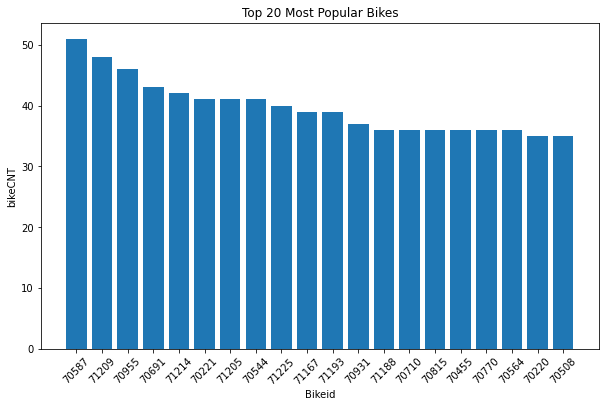

In [9]:
#makes a new df based off of bike counts and sorts by top 20
df_bikes = df_total.groupby(['month', 'Bikeid'])['Bikeid'].count().rename('bikeCNT').reset_index()
df_bike_month = df_bikes.loc[df_bikes['month'] == filter_month]
df_bike_month = df_bike_month.sort_values('bikeCNT', ascending = False)
df_bike_month = df_bike_month.head(20)

#graphs above df
fig = plt.figure(figsize=(10, 6))
plt.bar(range(len(df_bike_month['Bikeid'])), df_bike_month['bikeCNT'])
plt.xticks(range(len(df_bike_month['Bikeid'])),df_bike_month['Bikeid'],rotation = 45, fontsize = 10)
plt.xlabel('Bikeid')
plt.ylabel('bikeCNT')
plt.title('Top 20 Most Popular Bikes')
plt.show()

---
### Task 3

In this task you will create graphs to show the rebalancing issue.

### Task 3.1

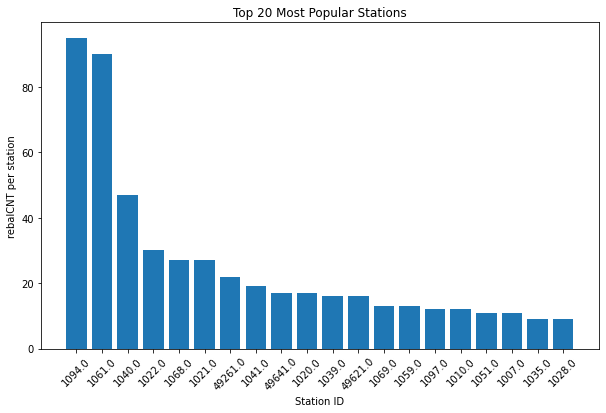

In [10]:
#entire cell is same as 2.1 but with rebal instead
df_rebal_month = df_rebal_month.reset_index()
df_pop2 = df_rebal_month.loc[df_rebal_month['month'] == filter_month]
df_pop2 = df_pop2.sort_values(['rebalCNT'], ascending = False)
df_pop2 = df_pop2.head(20)

fig = plt.figure(figsize=(10, 6))
plt.bar(range(len(df_pop2['From station id'])), df_pop2['rebalCNT'])
plt.xticks(range(len(df_pop2['From station id'])),df_pop2['From station id'],rotation = 45, fontsize = 10)
plt.xlabel('Station ID')
plt.ylabel('rebalCNT per station')
plt.title('Top 20 Most Popular Stations')
plt.show()

### Task 3.2

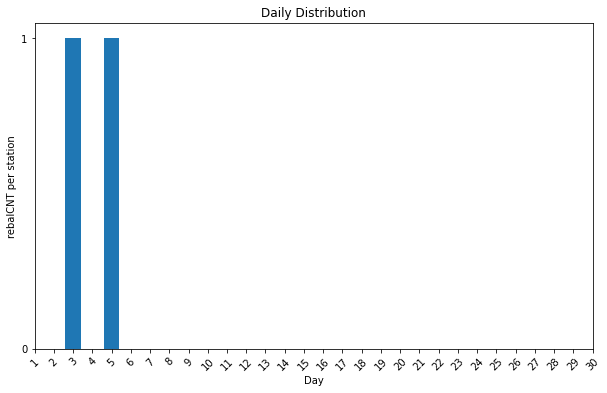

In [11]:
#this entire cell is same as 2.2 but with rebal instead
df_rebal_day = df_rebal_day.reset_index()
df_rebal_month = df_rebal_month.reset_index()

df_rebal_day['day'] = pd.DatetimeIndex(df_rebal_day['date']).day
df_rebal_day['month'] = pd.DatetimeIndex(df_rebal_day['date']).month

df_dail_dist2 = df_rebal_day.loc[(df_rebal_day['From station id'] == filter_stationID) & (df_rebal_day['month'] == filter_month)]

fig = plt.figure(figsize=(10, 6))
plt.bar(df_dail_dist2['day'], df_dail_dist2['rebalCNT'])
if(filter_month == 2):
    days = 28
elif(filter_month == 4, 6, 9):
    days = 30
else:
    days = 31
plt.xticks(range(1, days+1), range(1, days+1),rotation = 45, fontsize = 10)
plt.yticks(range(len(df_dail_dist2['rebalCNT'])),fontsize = 10)
plt.xlabel('Day')
plt.ylabel('rebalCNT per station')
plt.title('Daily Distribution')
plt.show()

---
### Task 4

In this task you will cluster the data to group similar stations together, using a variety of clustering functions and visualize the results of the clustering.

### Task 4.1

In [12]:
#creates date and month columns for q2
df_q2['date'] = df_q2['Starttime'].dt.date
df_q2['month'] = df_q2['Starttime'].dt.month

#new df with month counts
df_month_cluster = df_q2.groupby(['From station id', 'month'])['From station id'].count().rename('fromCNT').reset_index()

#fromCNT totals - creates a column for each month
df_month_cluster['m4'] = df_month_cluster.loc[df_month_cluster['month'] == 4]['fromCNT']
df_month_cluster['m5'] = df_month_cluster.loc[df_month_cluster['month'] == 5]['fromCNT']
df_month_cluster['m6'] = df_month_cluster.loc[df_month_cluster['month'] == 6]['fromCNT']
#sums each month column indiviually
df_month_cluster = df_month_cluster.groupby(df_month_cluster['From station id']).aggregate({'m4': 'sum', 'm5': 'sum', 'm6': 'sum'})

#rebalCNT calculations like task 1
df_rebal_cluster = df_q2.sort_values(['Bikeid', 'Starttime']).fillna(0)
df_rebal_cluster['prev_bike_id'] = df_rebal_cluster['Bikeid'].shift(1)
df_rebal_cluster['prev_station_id'] = df_rebal_cluster['To station id'].shift(1)
df_rebal_cluster = df_rebal_cluster.loc[(df_rebal_cluster['From station id'] != df_rebal_cluster['prev_station_id']) & (df_rebal_cluster['prev_station_id'] != 0) & (df_rebal_cluster['From station id'] != 0) & (df_rebal_cluster['prev_bike_id'] == df_rebal_cluster['Bikeid'])]
df_rebal_cluster = df_rebal_cluster.groupby(['month', 'From station id'])['From station id'].count().rename('rebalCNT').reset_index()

#rebalCNT totals - creates a column for each month
df_rebal_cluster['r4'] = df_rebal_cluster.loc[df_rebal_cluster['month'] == 4]['rebalCNT']
df_rebal_cluster['r5'] = df_rebal_cluster.loc[df_rebal_cluster['month'] == 5]['rebalCNT']
df_rebal_cluster['r6'] = df_rebal_cluster.loc[df_rebal_cluster['month'] == 6]['rebalCNT']
#sums each month column indiviually
df_rebal_cluster = df_rebal_cluster.groupby(df_rebal_cluster['From station id']).aggregate({'r4': 'sum', 'r5': 'sum', 'r6': 'sum'})

#combines the two df into one to be clustered
df_q3_cluster = pd.concat([df_month_cluster, df_rebal_cluster]).fillna(0)

#all of the clustering with various parameters
k_means_3 = cluster.KMeans(n_clusters=3, init='k-means++', random_state=5000)
k_means_3.fit(df_q3_cluster[['m4', 'm5', 'm6', 'r4', 'r5', 'r6']])
k_means_6 = cluster.KMeans(n_clusters=6, init='k-means++', random_state=5000)
k_means_6.fit(df_q3_cluster[['m4', 'm5', 'm6', 'r4', 'r5', 'r6']])
k_means_9 = cluster.KMeans(n_clusters=9, init='k-means++', random_state=5000)
k_means_9.fit(df_q3_cluster[['m4', 'm5', 'm6', 'r4', 'r5', 'r6']])
db_1 = cluster.DBSCAN(eps=0.5, min_samples=5)
db_1.fit(df_q3_cluster[['m4', 'm5', 'm6', 'r4', 'r5', 'r6']])
db_2 = cluster.DBSCAN(eps=0.25, min_samples=10)
db_2.fit(df_q3_cluster[['m4', 'm5', 'm6', 'r4', 'r5', 'r6']])
db_3 = cluster.DBSCAN(eps=0.125, min_samples=15)
db_3.fit(df_q3_cluster[['m4', 'm5', 'm6', 'r4', 'r5', 'r6']])



DBSCAN(eps=0.125, min_samples=15)

### Task 4.2

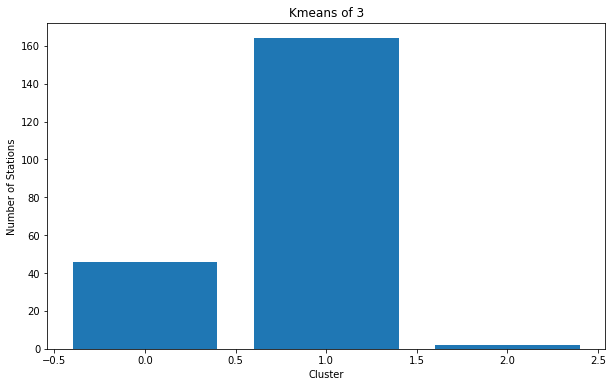

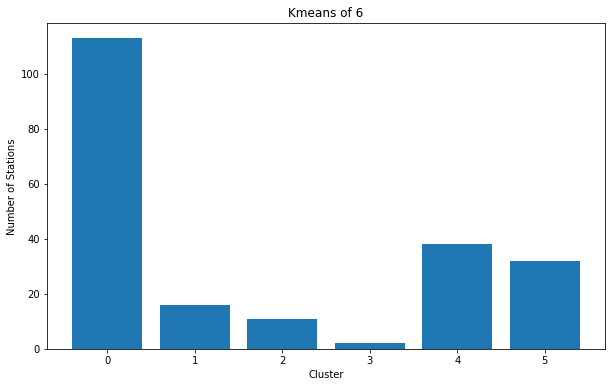

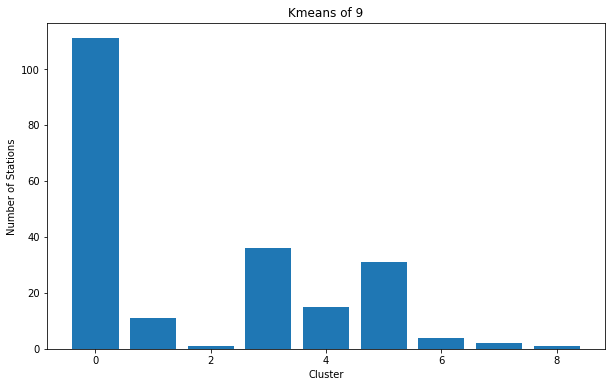

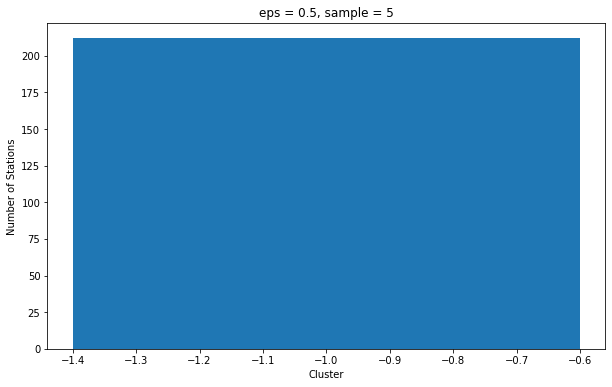

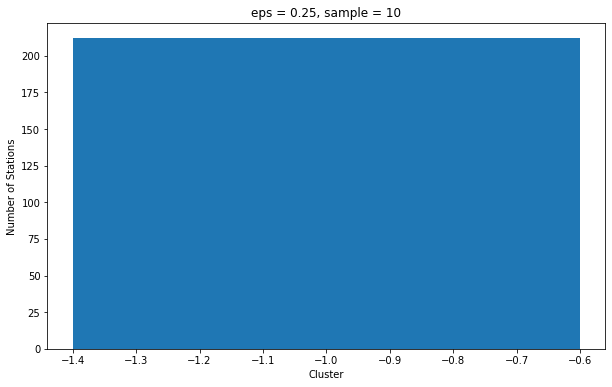

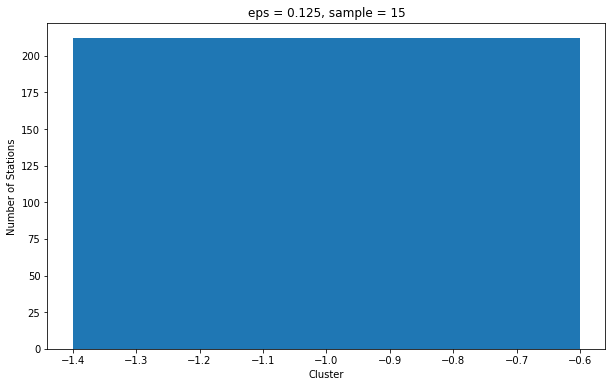

In [13]:
#all of the graphs are done in same way. a new df is created by counting the labels for y values and keys for x values
#and then they are just simply plotted like in task 2
df_k_means_3 = pd.DataFrame.from_dict(Counter(k_means_3.labels_),orient='index',columns=['stations'])
df_k_means_3['cluster'] = Counter(k_means_3.labels_).keys()
df_k_means_3 = df_k_means_3.sort_values(['stations'], ascending=False)
fig = plt.figure(figsize=(10, 6))
plt.bar(df_k_means_3['cluster'], df_k_means_3['stations'])
plt.xlabel('Cluster')
plt.ylabel('Number of Stations')
plt.title('Kmeans of 3')
plt.show()

df_k_means_6 = pd.DataFrame.from_dict(Counter(k_means_6.labels_),orient='index',columns=['stations'])
df_k_means_6['cluster'] = Counter(k_means_6.labels_).keys()
df_k_means_6 = df_k_means_6.sort_values(['stations'], ascending=False)
fig = plt.figure(figsize=(10, 6))
plt.bar(df_k_means_6['cluster'], df_k_means_6['stations'])
plt.xlabel('Cluster')
plt.ylabel('Number of Stations')
plt.title('Kmeans of 6')
plt.show()

df_k_means_9 = pd.DataFrame.from_dict(Counter(k_means_9.labels_),orient='index',columns=['stations'])
df_k_means_9['cluster'] = Counter(k_means_9.labels_).keys()
df_k_means_9 = df_k_means_9.sort_values(['stations'], ascending=False)
fig = plt.figure(figsize=(10, 6))
plt.bar(df_k_means_9['cluster'], df_k_means_9['stations'])
plt.xlabel('Cluster')
plt.ylabel('Number of Stations')
plt.title('Kmeans of 9')
plt.show()

df_db_1 = pd.DataFrame.from_dict(Counter(db_1.labels_),orient='index',columns=['stations'])
df_db_1['cluster'] = Counter(db_1.labels_).keys()
df_db_1 = df_db_1.sort_values(['stations'], ascending=False)
fig = plt.figure(figsize=(10, 6))
plt.bar(df_db_1['cluster'], df_db_1['stations'])
plt.xlabel('Cluster')
plt.ylabel('Number of Stations')
plt.title('eps = 0.5, sample = 5')
plt.show()

df_db_2 = pd.DataFrame.from_dict(Counter(db_2.labels_),orient='index',columns=['stations'])
df_db_2['cluster'] = Counter(db_2.labels_).keys()
df_db_2 = df_db_2.sort_values(['stations'], ascending=False)
fig = plt.figure(figsize=(10, 6))
plt.bar(df_db_2['cluster'], df_db_2['stations'])
plt.xlabel('Cluster')
plt.ylabel('Number of Stations')
plt.title('eps = 0.25, sample = 10')
plt.show()

df_db_3 = pd.DataFrame.from_dict(Counter(db_3.labels_),orient='index',columns=['stations'])
df_db_3['cluster'] = Counter(db_3.labels_).keys()
df_db_3 = df_db_3.sort_values(['stations'], ascending=False)
fig = plt.figure(figsize=(10, 6))
plt.bar(df_db_3['cluster'], df_db_3['stations'])
plt.xlabel('Cluster')
plt.ylabel('Number of Stations')
plt.title('eps = 0.125, sample = 15')
plt.show()

### Task 4.3

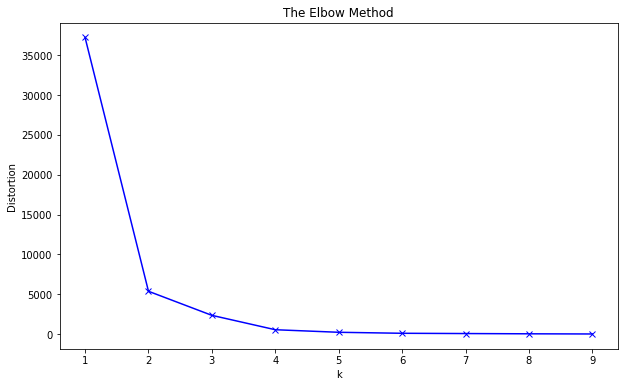

In [14]:
distortions = []
k_means_clusters = pd.concat([df_k_means_3, df_k_means_6, df_k_means_9])
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(k_means_clusters)
    distortions.append(kmeanModel.inertia_)

fig = plt.figure(figsize=(10,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method')
plt.show()

#Using the elbow method, a k-means size of 4 clusters is the best because past 4, there is very little variation. The closest to 4 that
#I personally used would be 6. I think that K-means clustering is better than DBSCAN because with DBSCAN no matter the samples and eps
#size, the resulting graph is always just one big cluster.